In [144]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Data

In [145]:
data = pd.read_csv('clean_data.csv', ',', keep_default_na=False)

data

C:\Users\yiche\AppData\Local\Temp\ipykernel_19236\1476388686.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv('clean_data.csv', ',', keep_default_na=False)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceType
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,MEDIUM
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,MEDIUM
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,MEDIUM
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,LOW
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,MEDIUM
1116,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,MEDIUM
1117,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,MEDIUM
1118,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,LOW


In [146]:
data.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage       int64
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
PriceType        object
Length: 81, dtype: object

# Binarization

In [147]:
data = data.apply(lambda x: pd.factorize(x)[0] if x.dtypes == object else x)

In [148]:
data['PriceType']

0       0
1       0
2       0
3       1
4       0
       ..
1115    0
1116    0
1117    0
1118    1
1119    1
Name: PriceType, Length: 1120, dtype: int64

In [149]:
data2 = pd.get_dummies(data, columns = ['Alley', 'OverallQual'])
new_attr_list = list(data2.columns)
new_attr_list.remove('PriceType')
data2 = data2[new_attr_list]
data2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Alley_2,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,1,60,0,65,8450,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,20,0,80,9600,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,60,0,68,11250,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,70,0,60,9550,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
4,5,60,0,84,14260,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [150]:
num_attribute = ['YearBuilt']
index_numeric = []

for col in num_attribute:
    index_numeric.append(data2.columns.get_loc(col))

In [151]:
index_numeric

[17]

# Split data

In [152]:
X = np.array(data2.values)
Y = np.array(data['PriceType'].values)

seed = 101
test_size = .3

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [153]:
display(x_train.shape, y_train.shape, x_test.shape, x_train)

(784, 90)

(784,)

(336, 90)

array([[1353,   50,    1, ...,    0,    0,    0],
       [ 725,   20,    0, ...,    0,    1,    0],
       [1035,   30,    0, ...,    0,    0,    0],
       ...,
       [  94,  190,    2, ...,    0,    0,    0],
       [ 773,   80,    0, ...,    0,    0,    0],
       [1119,   80,    0, ...,    0,    0,    0]], dtype=int64)

## Normalisation

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler = StandardScaler()
scaler.fit(x_train[:, index_numeric])
x_train[:, index_numeric] = scaler.transform(x_train[:, index_numeric])
x_test[:, index_numeric] = scaler.transform(x_test[:, index_numeric]) 

StandardScaler()

In [156]:
x_train_tmp = pd.DataFrame(x_train, columns=data2.columns)
x_train_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Alley_2,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,1353,50,1,50,6000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,725,20,0,86,13286,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1035,30,0,50,6305,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1413,90,0,60,7200,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1206,20,0,90,14684,0,1,0,0,3,...,0,0,0,0,0,0,1,0,0,0


In [157]:
x_train_tmp.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,784.0,736.968112,415.892811,2.0,382.75,739.0,1097.25,1460.0
MSSubClass,784.0,54.247449,39.689986,20.0,20.00,50.0,70.00,190.0
MSZoning,784.0,0.350765,0.804314,0.0,0.00,0.0,0.00,4.0
LotFrontage,784.0,71.123724,23.389396,21.0,60.00,70.0,80.25,313.0
LotArea,784.0,9997.422194,5321.933073,1300.0,7798.75,9525.0,11363.25,70761.0
...,...,...,...,...,...,...,...,...
OverallQual_6,784.0,0.238520,0.426451,0.0,0.00,0.0,0.00,1.0
OverallQual_7,784.0,0.247449,0.431805,0.0,0.00,0.0,0.00,1.0
OverallQual_8,784.0,0.126276,0.332372,0.0,0.00,0.0,0.00,1.0
OverallQual_9,784.0,0.034439,0.182470,0.0,0.00,0.0,0.00,1.0


# Create the model

In [158]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [159]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]

    box_labels = [f"{v1}".strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

In [160]:
model = DecisionTreeClassifier(criterion='entropy', random_state=seed)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [161]:
predictions

array([1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0,
       0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [162]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1,
       1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0,
       0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0,
       1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2,
       0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1,

In [163]:
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.7678571428571429


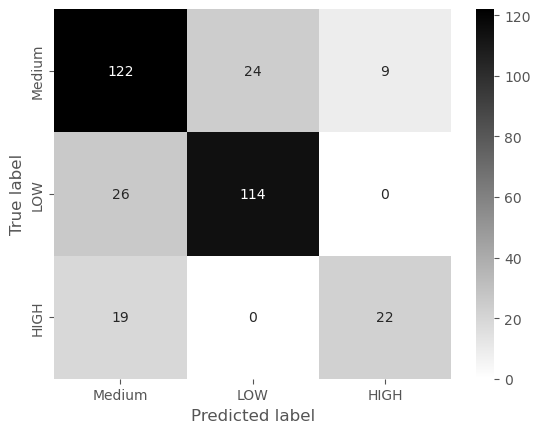

In [164]:
categories = ['Medium', 'LOW', 'HIGH']
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')